In [1]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colormaps
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

import numpy as np
import pandas as pd
import os

### Read shape file
https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

In [2]:
# get the country border file (10m resolution) and extract
shpfilename = shpreader.natural_earth(
    resolution="10m",
    category="cultural",
    name="admin_0_countries",
)
reader = shpreader.Reader(shpfilename)

countries = reader.records()

### Read all country names in shape file using Fiona

In [3]:
import fiona

# Open the shapefile using Fiona
with fiona.open(shpfilename, 'r') as source:
    
    # Extract country names from the 'NAME' attribute
    country_names = [feature['properties']['NAME'] for feature in source]

# Print the list of country names
print(country_names)

['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina', 'Dhekelia', 'Cyprus', 'India', 'China', 'Israel', 'Palestine', 'Lebanon', 'Ethiopia', 'S. Sudan', 'Somalia', 'Kenya', 'Malawi', 'Tanzania', 'Syria', 'Somaliland', 'France', 'Suriname', 'Guyana', 'South Korea', 'North Korea', 'Morocco', 'W. Sahara', 'Costa Rica', 'Nicaragua', 'Congo', 'Dem. Rep. Congo', 'Bhutan', 'Ukraine', 'Belarus', 'Namibia', 'South Africa', 'St-Martin', 'Sint Maarten', 'Oman', 'Uzbekistan', 'Kazakhstan', 'Tajikistan', 'Lithuania', 'Brazil', 'Uruguay', 'Mongolia', 'Russia', 'Czechia', 'Germany', 'Estonia', 'Latvia', 'Norway', 'Sweden', 'Finland', 'Vietnam', 'Cambodia', 'Luxembourg', 'United Arab Emirates', 'Belgium', 'Georgia', 'North Macedonia', 'Albania', 'Azerbaijan', 'Kosovo', 'Turkey', 'Spain', 'Laos', 'Kyrgyzstan', 'Armenia', 'Denmark', 'Libya', 'Tunisia', 'Romania', 'Hungary', 'Slovakia', 'Poland', 'Ireland', 'United Kingdom', 'Greece', 'Zambia', 'Sierra Leone', 'Guinea', 'Liberia', 'Central Af

### Extract only information of required countries

In [4]:
# required countries
required = ["Nepal", "India", "Bangladesh","China","Pakistan","Sri Lanka"]


# extract the specific country information
c = {
    co.attributes["ADMIN"]: co
    for co in countries if co.attributes["ADMIN"] in required
}

c

{'India': <Record: <shapely.geometry.multipolygon.MultiPolygon object at 0x000001E050833910>, {'featurecla': 'Admin-0 country', 'scalerank': 0, 'LABELRANK': 2, 'SOVEREIGNT': 'India', 'SOV_A3': 'IND', 'ADM0_DIF': 0, 'LEVEL': 2, 'TYPE': 'Sovereign country', 'TLC': '1', 'ADMIN': 'India', 'ADM0_A3': 'IND', 'GEOU_DIF': 0, 'GEOUNIT': 'India', 'GU_A3': 'IND', 'SU_DIF': 0, 'SUBUNIT': 'India', 'SU_A3': 'IND', 'BRK_DIFF': 0, 'NAME': 'India', 'NAME_LONG': 'India', 'BRK_A3': 'IND', 'BRK_NAME': 'India', 'BRK_GROUP': None, 'ABBREV': 'India', 'POSTAL': 'IND', 'FORMAL_EN': 'Republic of India', 'FORMAL_FR': None, 'NAME_CIAWF': 'India', 'NOTE_ADM0': None, 'NOTE_BRK': None, 'NAME_SORT': 'India', 'NAME_ALT': None, 'MAPCOLOR7': 1, 'MAPCOLOR8': 3, 'MAPCOLOR9': 2, 'MAPCOLOR13': 2, 'POP_EST': 1366417754.0, 'POP_RANK': 18, 'POP_YEAR': 2019, 'GDP_MD': 2868929, 'GDP_YEAR': 2019, 'ECONOMY': '3. Emerging region: BRIC', 'INCOME_GRP': '4. Lower middle income', 'FIPS_10': 'IN', 'ISO_A2': 'IN', 'ISO_A2_EH': 'IN', 'ISO

In [5]:
type(c["Nepal"])

cartopy.io.shapereader.FionaRecord

### Plot the `required` countries

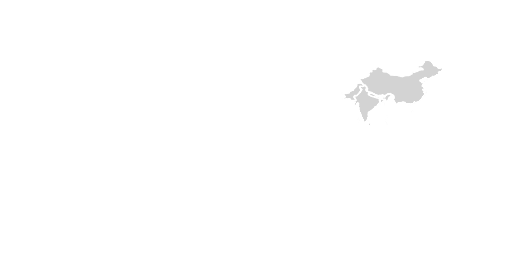

In [6]:
# plot the countries
ax = plt.axes(projection=ccrs.PlateCarree())

for cn in c.values():
    ax.add_geometries(cn.geometry,
                      crs=ccrs.PlateCarree(),
                      edgecolor="white",
                      facecolor="lightgray")
    
plt.axis("off")
plt.show()

### Clipping

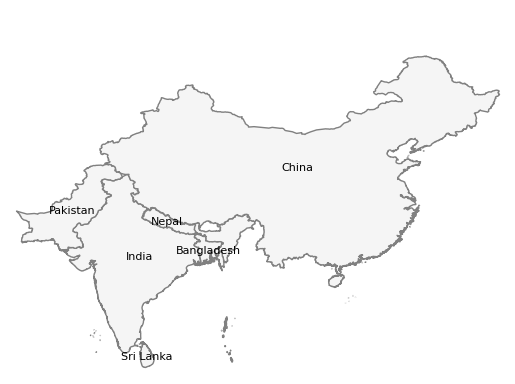

In [7]:
# get overall boundary box from country bounds
extents = np.array([c[cn].bounds for cn in c])
lon = [extents.min(0)[0], extents.max(0)[2]]
lat = [extents.min(0)[1], extents.max(0)[3]]

ax = plt.axes(projection=ccrs.PlateCarree())

# get country centroids
ax.set_extent([lon[0] - 1, lon[1] + 1, lat[0] - 1, lat[1] + 1])

   
for key, cn in zip(c.keys(),c.values()):
    ax.add_geometries(cn.geometry,
                      crs=ccrs.PlateCarree(),
                      edgecolor="gray",
                      facecolor="whitesmoke",
                     zorder = 1)
    
    # Add country names
    centroid = cn.geometry.centroid
    
    ax.text(
        centroid.x,
        centroid.y,
        key,  # Assuming 'name' is the attribute containing the country names
        horizontalalignment='center',
        verticalalignment='center',
        transform=ccrs.PlateCarree(),
        fontsize=8,  # Adjust the font size as needed
        color='black',  # Set the color of the text
        zorder = 2
        )
    


plt.axis("off")
plt.show()


### Read required data file with trade values

In [8]:
file = "Trade_input_data_part_I.xlsx"

df = pd.read_excel(file,
                   sheet_name = "Sheet1")
df

,Country1,Country2,Start Arrow1,End Arrow1,Start Arrow2,End Arrow2,Value1,Value2
0,Nepal,India,"(81.2548402216784,28.8208864868961)","(77.2769784283439,21.0458534112202)","(79.14142839024,20.2930667551296)","(82.57116454217,28.2347843781043)",67,80
1,Nepal,Bangladesh,"(85.9928298872189,27.1510559259168)","(89.432830549852,22.5963553119019)","(90.9487821931249,23.1754430641139)","(87.5541956674009,27.3647546455774)",70,98
2,Nepal,China,"(84.8416530576975,27.6917052993984)","(100.043487737787,33.9399039402777)","(96.3584484254969,36.1342779550867)","(83.8323398158385,28.2563160867418)",85,75
3,India,Pakistan,"(75.0383171907546,22.6499358518148)","(68.7979535532985,27.5453145867764)","(70.5998192756134,29.4585852913259)","(76.4243291239521,25.0449971384102)",87,84
4,India,Sri Lanka,"(76.4653067283906,16.346474866478)","(80.3566708055722,6.66044848894898)","(81.6028328220156,7.21995529756252)","(78.1420195884534,17.6808519367431)",94,53


### Create dictionaries of trade volumes `transfers`

In [9]:
keys = [country1+","+country2 for country1,country2 in zip(df["Country1"], df["Country2"])]

values = [[value1, value2] for value1, value2 in zip(df["Value1"],df["Value2"])]

# flows in and out of country pairs
transfers = {key:value for key, value in zip(keys, values)}
transfers

{'Nepal,India': [67, 80],
 'Nepal,Bangladesh': [70, 98],
 'Nepal,China': [85, 75],
 'India,Pakistan': [87, 84],
 'India,Sri Lanka': [94, 53]}

### Create dictionary to find positions where arrow should start and end

In [10]:
import ast

coords1 = []
for coord in df["Start Arrow1"].values:
    coords1.append(ast.literal_eval(coord))
coords1

coords2 = []
for coord in df["End Arrow1"].values:
    coords2.append(ast.literal_eval(coord))
coords2

coords3 = []
for coord in df["Start Arrow2"].values:
    coords3.append(ast.literal_eval(coord))

coords4 = []
for coord in df["End Arrow2"].values:
    coords4.append(ast.literal_eval(coord))

In [11]:
startarrow1_dict = {key:value for key, value in zip(keys, coords1)}
endarrow1_dict = {key:value for key, value in zip(keys, coords2)}

startarrow2_dict = {key:value for key, value in zip(keys, coords3)}
endarrow2_dict = {key:value for key, value in zip(keys, coords4)}



In [12]:
transfers

{'Nepal,India': [67, 80],
 'Nepal,Bangladesh': [70, 98],
 'Nepal,China': [85, 75],
 'India,Pakistan': [87, 84],
 'India,Sri Lanka': [94, 53]}

In [13]:
startarrow1_dict

{'Nepal,India': (81.2548402216784, 28.8208864868961),
 'Nepal,Bangladesh': (85.9928298872189, 27.1510559259168),
 'Nepal,China': (84.8416530576975, 27.6917052993984),
 'India,Pakistan': (75.0383171907546, 22.6499358518148),
 'India,Sri Lanka': (76.4653067283906, 16.346474866478)}

### Setting colormaps for arrows

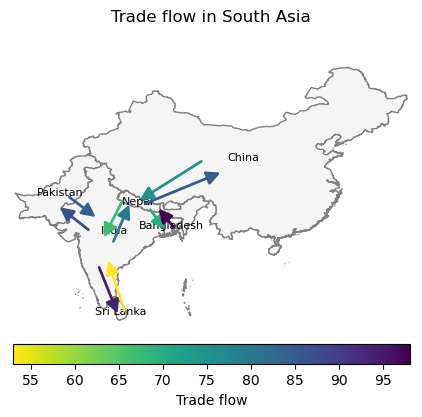

In [14]:
ax = plt.axes(projection=ccrs.PlateCarree())

# get country centroids
ax.set_extent([lon[0] - 1, lon[1] + 1, lat[0] - 1, lat[1] + 1])

for key, cn in zip(c.keys(),c.values()):
    ax.add_geometries(cn.geometry,
                      crs=ccrs.PlateCarree(),
                      edgecolor="grey",
                      facecolor="whitesmoke",
                     zorder = 1)
    
    # Add country names
    centroid = cn.geometry.centroid
    
    ax.text(
        centroid.x,
        centroid.y,
        key,  # Assuming 'name' is the attribute containing the country names
        horizontalalignment='center',
        verticalalignment='center',
        transform=ccrs.PlateCarree(),
        fontsize=8,  # Adjust the font size as needed
        color='black',  # Set the color of the text
        zorder = 2
       )
    

# set up a colormap
cmap = colormaps.get("viridis_r")
tmin = np.array([v for v in transfers.values()]).min()
tmax = np.array([v for v in transfers.values()]).max()
norm = Normalize(tmin, tmax)

for tr in transfers:
    c1, c2 = tr.split(",")
    startarrow1 = startarrow1_dict[tr]
    endarrow1 = endarrow1_dict[tr]
    
    startarrow2 = startarrow2_dict[tr]
    endarrow2 = endarrow2_dict[tr]
    
    
    t1 = transfers[tr][0]
    col = cmap(norm(t1))
    
    # Use the arrow function to draw arrows
    arrow = mpatches.FancyArrowPatch(
        (startarrow1[0], startarrow1[1]),
        (endarrow1[0], endarrow1[1]),
        mutation_scale=20,    #control the length of head of arrow 
        color=col,
        arrowstyle='-|>',
        linewidth=2,  # You can adjust the linewidth to control the arrow body width
        zorder = 3
    )
    ax.add_patch(arrow)
    
    #OTHER WAY
    offset = 1
    t2 = transfers[tr][1]
    col = cmap(norm(t2))
    arrow = mpatches.FancyArrowPatch(
        (startarrow2[0], startarrow2[1]),
        (endarrow2[0], endarrow2[1]),
        mutation_scale=20,
        color=col,
        arrowstyle='-|>',
        linewidth=2,  # You can adjust the linewidth to control the arrow body width
        zorder = 4
    )
    ax.add_patch(arrow)
    
sm = ScalarMappable(norm, cmap)
fig = plt.gcf()
cbar = fig.colorbar(sm, ax=ax,
            orientation = "horizontal",
            pad = 0.05,  #distance between main plot and colorbar
            shrink = 0.8, #control length
            aspect = 20  #control width
            )
cbar.set_label("Trade flow")

plt.title("Trade flow in South Asia")
plt.axis("off")

plt.savefig("trade_flow_part_i.jpeg",
           dpi = 300)
plt.show()